# Variable Exploration Notebook

Just taking a quick view through the fields (and levels) that are available in the UPP grib2 files

In [1]:
# Standard Library
import warnings

# Main Scientific Libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Supplimental Libraries
import cfgrib

# Geographic/Meteorological Libraries
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
import metpy.interpolate as mpinterp
from metpy.plots import Hodograph, SkewT, USCOUNTIES, USSTATES
from metpy.units import units

## Local Sample from Svr Wx Case Study

In [2]:
filepath_template = "{base_dir}{grid_subdir}HRRR.t{init_hr:02d}z.bg{collection}{f_hr:02d}.tm{init_hr:02d}"
base_dir = "/home/jthielen/Downloads/ufs_sample/"
grid_subdir = "25km/"
init_hr = 0
collection = "dawp"
f_hr = 21

In [3]:
# Collect all homogeneous datasets within the heterogeneous grib file
datasets = cfgrib.open_datasets(filepath_template.format(
    base_dir=base_dir,
    grid_subdir=grid_subdir,
    init_hr=init_hr,
    collection=collection,
    f_hr=f_hr
))

In [4]:
# Build a report of all varibles in this collection
for i, ds in enumerate(datasets):
    print('Dataset {}\n'.format(i))
    print(ds.coords)
    print()
    for varname, var in ds.data_vars.items():
        print(varname + ' ' + str(var.dims))
        for attr in ('long_name', 'units', 'standard_name'):
            if attr in var.attrs:
                print('\t' + attr + ': ' + var.attrs[attr])
        print()
    print('----\n')

Dataset 0

Coordinates:
    time                   datetime64[ns] 2019-06-15
    step                   timedelta64[ns] 21:00:00
    adiabaticCondensation  int64 0
    latitude               (y, x) float64 25.12 25.17 25.22 ... 45.8 45.73 45.65
    longitude              (y, x) float64 239.3 239.5 239.7 ... 293.1 293.4
    valid_time             datetime64[ns] 2019-06-15T21:00:00

pres ('y', 'x')
	long_name: Pressure
	units: Pa

gh ('y', 'x')
	long_name: Geopotential Height
	units: gpm
	standard_name: geopotential_height

----

Dataset 1

Coordinates:
    time        datetime64[ns] 2019-06-15
    step        timedelta64[ns] 21:00:00
    cloudBase   int64 0
    latitude    (y, x) float64 25.12 25.17 25.22 25.28 ... 45.8 45.73 45.65
    longitude   (y, x) float64 239.3 239.5 239.7 240.0 ... 292.8 293.1 293.4
    valid_time  datetime64[ns] 2019-06-15T21:00:00

pres ('y', 'x')
	long_name: Pressure
	units: Pa

gh ('y', 'x')
	long_name: Geopotential Height
	units: gpm
	standard_name: geopote

In [5]:
ds

<xarray.Dataset>
Dimensions:     (x: 191, y: 97)
Coordinates:
    time        datetime64[ns] 2019-06-15
    step        timedelta64[ns] 21:00:00
    level       int64 0
    latitude    (y, x) float64 25.12 25.17 25.22 25.28 ... 45.8 45.73 45.65
    longitude   (y, x) float64 239.3 239.5 239.7 240.0 ... 292.8 293.1 293.4
    valid_time  datetime64[ns] 2019-06-15T21:00:00
Dimensions without coordinates: x, y
Data variables:
    paramId_0   (y, x) float32 ...
    pres        (y, x) float32 ...
    u           (y, x) float32 ...
    v           (y, x) float32 ...
    gh          (y, x) float32 ...
    pwat        (y, x) float32 ...
    lcc         (y, x) float32 ...
    mcc         (y, x) float32 ...
    hcc         (y, x) float32 ...
    tcc         (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mconv       (y, x) float32 ...
    tcolr       (y, x) float32 ...
    tcols       (y, x) float32 ...
    cdlyr       (y, x) float32 ...
    tcolw       (y, x) float32 ...
    tcoli       (y, x) float32 ...
    tcolc       (y, x) float32 ...
    veril       (y, x) float32 ...
    lrghr       (y, x) float32 ...
    tclsw       (y, x) float32 ...
    tcolm       (y, x) float32 ...
    swhr        (y, x) float32 ...
    lwhr        (y, x) float32 ...
    refzr       (y, x) float32 ...
    refzi       (y, x) float32 ...
    refc        (y, x) float32 ...
    VRATE       (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

In [17]:
ds['refc']

<xarray.DataArray 'refc' (y: 97, x: 191)>
array([[-20.  , -20.  , -20.  , ..., -20.  , -20.  , -20.  ],
       [-20.  , -20.  , -20.  , ..., -14.63, -20.  , -20.  ],
       [-20.  , -20.  , -20.  , ...,  -6.25, -20.  , -20.  ],
       ...,
       [-20.  , -20.  , -20.  , ..., -20.  , -20.  , -20.  ],
       [-20.  , -20.  , -20.  , ..., -20.  , -20.  , -20.  ],
       [-20.  , -20.  , -20.  , ..., -15.36, -20.  , -20.  ]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2019-06-15
    step        timedelta64[ns] 21:00:00
    level       int64 0
    latitude    (y, x) float64 25.12 25.17 25.22 25.28 ... 45.8 45.73 45.65
    longitude   (y, x) float64 239.3 239.5 239.7 240.0 ... 292.8 293.1 293.4
    valid_time  datetime64[ns] 2019-06-15T21:00:00
Dimensions without coordinates: y, x
Attributes:
    GRIB_paramId:                             260390
    GRIB_shortName:                           refc
    GRIB_units:                               dB
    GRIB_name:                                Maximum/Composite radar reflect...
    GRIB_dataType:                            fc
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      18527
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            lambert
    GRIB_gridDefinitionDescription:           Lambert Conformal can be secant...
    GRIB_LaDInDegrees:                        38.5
    GRIB_LoVInDegrees:                        262.5
    GRIB_iScansNegatively:                    0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   25.116484
    GRIB_latitudeOfSouthernPoleInDegrees:     0.0
    GRIB_longitudeOfFirstGridPointInDegrees:  239.27037
    GRIB_longitudeOfSouthernPoleInDegrees:    0.0
    GRIB_DyInMetres:                          25000.0
    GRIB_DxInMetres:                          25000.0
    GRIB_Latin2InDegrees:                     38.5
    GRIB_Latin1InDegrees:                     38.5
    GRIB_Ny:                                  97
    GRIB_Nx:                                  191
    long_name:                                Maximum/Composite radar reflect...
    units:                                    dB

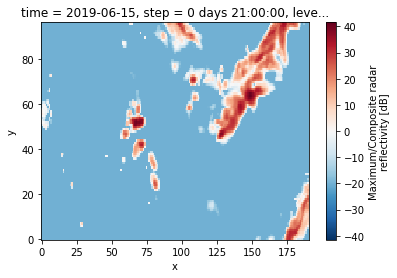

In [18]:
ds['refc'].plot()

In [8]:
from pyart.graph import cm_colorblind
import matplotlib.gridspec as gridspec

import yaml


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [10]:
with open("../config.yml", "r") as config_file:
    config = yaml.load(config_file, Loader=yaml.FullLoader)

In [11]:
config

{'upp_filepath_template': '{base_dir}{grid_subdir}HRRR.t{init_hr:02d}z.bg{collection}{f_hr:02d}.tm{init_hr:02d}',
 'figsize': [15, 8],
 'defaults': {'base_dir': '/home/jthielen/Downloads/ufs_sample/'}}

In [19]:
# Get refl var with assigning helpful coordinate information
refl = ds['refc'].metpy.assign_crs(
    grid_mapping_name='lambert_conformal_conic',
    longitude_of_central_meridian=refl.attrs["GRIB_LoVInDegrees"],
    latitude_of_projection_origin=refl.attrs["GRIB_LaDInDegrees"],
    standard_parallel=(
        refl.attrs["GRIB_Latin1InDegrees"],
        refl.attrs["GRIB_Latin2InDegrees"]
    )
).metpy.assign_y_x()

# Mask out low values
refl.data[refl.data < 0] = np.nan

refl

<xarray.DataArray 'refc' (y: 97, x: 191)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2019-06-15
    step        timedelta64[ns] 21:00:00
    level       int64 0
    latitude    (y, x) float64 25.12 25.17 25.22 25.28 ... 45.8 45.73 45.65
    longitude   (y, x) float64 239.3 239.5 239.7 240.0 ... 292.8 293.1 293.4
    valid_time  datetime64[ns] 2019-06-15T21:00:00
    crs         object Projection: lambert_conformal_conic
  * y           (y) float64 -1.2e+06 -1.175e+06 -1.15e+06 ... 1.175e+06 1.2e+06
  * x           (x) float64 -2.375e+06 -2.35e+06 ... 2.35e+06 2.375e+06
Attributes:
    GRIB_paramId:                             260390
    GRIB_shortName:                           refc
    GRIB_units:                               dB
    GRIB_name:                                Maximum/Composite radar reflect...
    GRIB_dataType:                            fc
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      18527
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            lambert
    GRIB_gridDefinitionDescription:           Lambert Conformal can be secant...
    GRIB_LaDInDegrees:                        38.5
    GRIB_LoVInDegrees:                        262.5
    GRIB_iScansNegatively:                    0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   25.116484
    GRIB_latitudeOfSouthernPoleInDegrees:     0.0
    GRIB_longitudeOfFirstGridPointInDegrees:  239.27037
    GRIB_longitudeOfSouthernPoleInDegrees:    0.0
    GRIB_DyInMetres:                          25000.0
    GRIB_DxInMetres:                          25000.0
    GRIB_Latin2InDegrees:                     38.5
    GRIB_Latin1InDegrees:                     38.5
    GRIB_Ny:                                  97
    GRIB_Nx:                                  191
    long_name:                                Maximum/Composite radar reflect...
    units:                                    dB

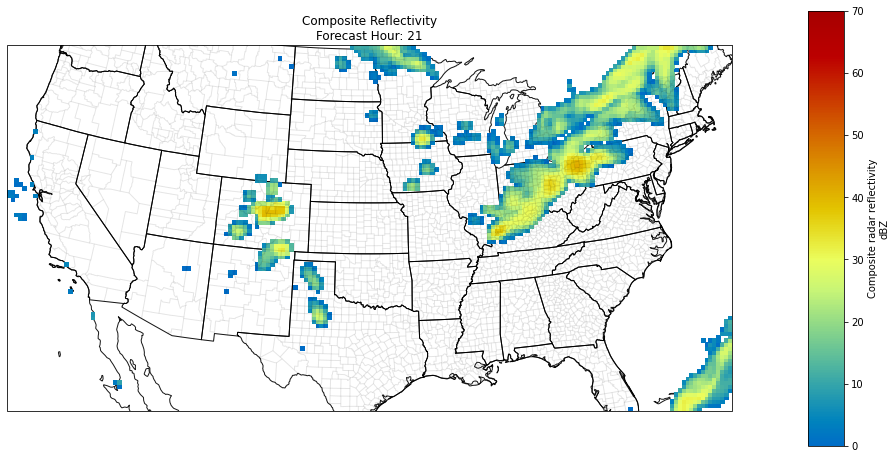

In [29]:
# Create plot
fig = plt.figure(figsize=config['figsize'])
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 0.05])

ax = plt.subplot(gs[0, 0], projection=refl.metpy.cartopy_crs)
pcm = ax.pcolormesh(
    refl['x'],
    refl['y'],
    refl.data,
    cmap=cm_colorblind.HomeyerRainbow,
    vmin=0,
    vmax=70,
    zorder=2
)
ax.set_extent(
    [refl['x'].data.min(), refl['x'].data.max(), refl['y'].data.min(), refl['y'].data.max()],
    crs=refl.metpy.cartopy_crs
)
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor=(0, 0, 0, 0.05), zorder=3)
ax.add_feature(USSTATES.with_scale('20m'), edgecolor=(0, 0, 0, 0.9), zorder=1)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor=(0, 0, 0, 0.9), zorder=1)

cax = plt.subplot(gs[0, 1])
cax.margins(y=0.5)
cb = plt.colorbar(pcm, cax=cax, orientation="vertical", shrink=0.7)
cb.set_label("Composite radar reflectivity\ndBZ")
ax.set_title(f"Composite Reflectivity\nForecast Hour: {f_hr}")

plt.savefig("../output/test.png", dpi=300)

In [30]:
refl_values = refl.values
refl_values[refl_values < 0] = np.nan

array([ 0.23, 12.65, 25.69, ..., 21.7 , 16.72,  2.6 ], dtype=float32)

/home/jthielen/miniconda3/envs/ufs/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


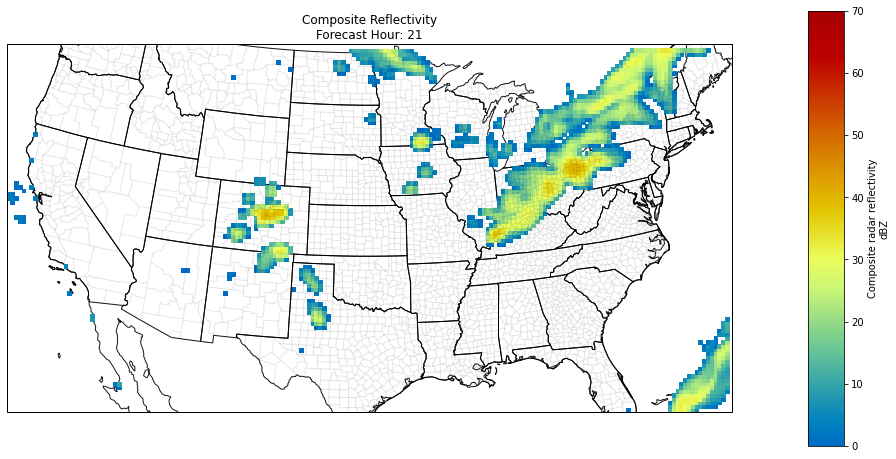

In [45]:
# Create plot
fig = plt.figure(figsize=config['figsize'])
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 0.05])

refl_values = refl.values
refl_values[refl_values < 0] = np.nan
crs = ccrs.LambertConformal(
    central_longitude=refl.attrs["GRIB_LoVInDegrees"],
    central_latitude=refl.attrs["GRIB_LaDInDegrees"],
    standard_parallels=[
        refl.attrs["GRIB_Latin1InDegrees"],
        refl.attrs["GRIB_Latin2InDegrees"]
    ]
)
x_min, y_min = crs.transform_point(
    refl.attrs["GRIB_longitudeOfFirstGridPointInDegrees"],
    refl.attrs["GRIB_latitudeOfFirstGridPointInDegrees"],
    ccrs.PlateCarree()
)
x_max = x_min + refl.attrs["GRIB_Nx"] * refl.attrs["GRIB_DxInMetres"]
y_max = y_min + refl.attrs["GRIB_Ny"] * refl.attrs["GRIB_DyInMetres"]

ax = plt.subplot(gs[0, 0], projection=crs)
pcm = ax.pcolormesh(
    refl.longitude,
    refl.latitude,
    refl_values,
    cmap=cm_colorblind.HomeyerRainbow,
    vmin=0,
    vmax=70,
    transform=ccrs.PlateCarree(),
    zorder=2
)
ax.set_extent([x_min, x_max, y_min, y_max], crs=crs)
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor=(0, 0, 0, 0.05), zorder=3)
ax.add_feature(USSTATES.with_scale('20m'), edgecolor=(0, 0, 0, 0.9), zorder=1)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor=(0, 0, 0, 0.9), zorder=1)

cax = plt.subplot(gs[0, 1])
cb = plt.colorbar(pcm, cax=cax, orientation="vertical")
cb.set_label("Composite radar reflectivity\ndBZ")
ax.set_title(f"Composite Reflectivity\nForecast Hour: {f_hr}")

plt.savefig("../output/test.png", dpi=300, bbox_inches="tight")

In [30]:
datasets[26]

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 45, x: 191, y: 97)
Coordinates:
    time           datetime64[ns] 2019-06-15
    step           timedelta64[ns] 21:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 ... 20 10 7 5 2
    latitude       (y, x) float64 25.12 25.17 25.22 25.28 ... 45.8 45.73 45.65
    longitude      (y, x) float64 239.3 239.5 239.7 240.0 ... 292.8 293.1 293.4
    valid_time     datetime64[ns] 2019-06-15T21:00:00
Dimensions without coordinates: x, y
Data variables:
    t              (isobaricInhPa, y, x) float32 ...
    u              (isobaricInhPa, y, x) float32 ...
    v              (isobaricInhPa, y, x) float32 ...
    q              (isobaricInhPa, y, x) float32 ...
    w              (isobaricInhPa, y, x) float32 ...
    gh             (isobaricInhPa, y, x) float32 ...
    r              (isobaricInhPa, y, x) float32 ...
    dpt            (isobaricInhPa, y, x) float32 ...
    clwmr          (isobaricInhPa, y, x) float32 ...
    icmr           (isobaricInhPa, y, x) float32 ...
    rwmr           (isobaricInhPa, y, x) float32 ...
    snmr           (isobaricInhPa, y, x) float32 ...
    rime           (isobaricInhPa, y, x) float32 ...
    tke            (isobaricInhPa, y, x) float32 ...
    wz             (isobaricInhPa, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP

## UPP Output from Severe Weather Case Study

**15 June 2019 00 UTC Init**

In [ ]:
# Configuration for which UPP output to grab
base_dir = #'/gpfs/fs1/p/ral/jntp/ufs_phys/fv3_severe_wx/'
phys_subdir = 'GFSv16beta/' # ['GFSv16beta', 'GSDv0_noah']
grid_subdir = '25km/' # ['25km', '13km', '3km']
collection = 'dawp' # ['dawp', 'rd3d']
f_hr = 21 # range(0, 49)
filename = f'HRRR.t00z.bg{collection}{f_hr:02d}.tm00'

In [ ]:
# Collect all homogeneous datasets within the heterogeneous grib file
datasets = cfgrib.open_datasets(base_dir + phys_subdir + grid_subdir + filename)

In [ ]:
# Build a report of all varibles in this collection
for i, ds in enumerate(datasets):
    print('Dataset {}\n'.format(i))
    print(ds.coords)
    print()
    for varname, var in ds.data_vars.items():
        print(varname + ' ' + str(var.dims))
        for attr in ('long_name', 'units', 'standard_name'):
            if attr in var.attrs:
                print('\t' + attr + ': ' + var.attrs[attr])
        print()
    print('----\n')

## UPP Output from Canned Test Case

In [ ]:
# Configuration for which UPP output to grab
base_dir = '/glade/work/jthielen/fv3/expt_dirs/test_community/2019090118/'
subdir = 'postprd/'
collection = 'rd3d' # ['dawp', 'rd3d']
f_hr = 3 # range(0, 7)
filename = f'HRRR.t18z.bg{collection}{f_hr:02d}.tm18'

In [ ]:
# Collect all homogeneous datasets within the heterogeneous grib file
datasets = cfgrib.open_datasets(base_dir + subdir + filename)

In [ ]:
# Build a report of all varibles in this collection
for i, ds in enumerate(datasets):
    print('Dataset {}\n'.format(i))
    print(ds.coords)
    print()
    for varname, var in ds.data_vars.items():
        print(varname + ' ' + str(var.dims))
        for attr in ('long_name', 'units', 'standard_name'):
            if attr in var.attrs:
                print('\t' + attr + ': ' + var.attrs[attr])
        print()
    print('----\n')

In [8]:
_areas = {
    '105': (-129.3, -22.37, 17.52, 53.78),
    'local': (-92., -64., 28.5, 48.5),
    'wvaac': (120.86, -15.07, -53.6, 89.74),
    'tropsfc': (-100., -55., 8., 33.),
    'epacsfc': (-155., -75., -20., 33.),
    'ofagx': (-100., -80., 20., 35.),
    'ahsf': (-105., -30., -5., 35.),
    'ehsf': (-145., -75., -5., 35.),
    'shsf': (-125., -75., -20., 5.),
    'tropful': (-160., 0., -20., 50.),
    'tropatl': (-115., 10., 0., 40.),
    'subtrop': (-90., -20., 20., 60.),
    'troppac': (-165., -80., -25., 45.),
    'gulf': (-105., -70., 10., 40.),
    'carib': (-100., -50., 0., 40.),
    'sthepac': (-170., -70., -60., 0.),
    'opcahsf': (-102., -20., 0., 45.),
    'opcphsf': (175., -70., -28., 45.),
    'wwe': (-106., -50., 18., 54.),
    'world': (-24., -24., -90., 90.),
    'nwwrd1': (-180., 180., -90., 90.),
    'nwwrd2': (0., 0., -90., 90.),
    'afna': (-135.02, -23.04, 10.43, 40.31),
    'awna': (-141.03, -18.58, 7.84, 35.62),
    'medr': (-178., -25., -15., 5.),
    'pacsfc': (129., -95., -5., 18.),
    'saudi': (4.6, 92.5, -13.2, 60.3),
    'natlmed': (-30., 70., 0., 65.),
    'ncna': (-135.5, -19.25, 8., 37.7),
    'ncna2': (-133.5, -20.5, 10., 42.),
    'hpcsfc': (-124., -26., 15., 53.),
    'atlhur': (-96., -6., 4., 3.),
    'nam': (-134., 3., -4., 39.),
    'sam': (-120., -20., -60., 20.),
    'samps': (-148., -36., -28., 12.),
    'eur': (-16., 80., 24., 52.),
    'afnh': (-155.19, 18.76, -6.8, -3.58),
    'awnh': (-158.94, 15.35, -11.55, -8.98),
    'wwwus': (-127.7, -59., 19.8, 56.6),
    'ccfp': (-130., -65., 22., 52.),
    'llvl': (-119.6, -59.5, 19.9, 44.5),
    'llvl2': (-125., -32.5, 5., 46.),
    'llvl_e': (-89., -59.5, 23.5, 44.5),
    'llvl_c': (-102.4, -81.25, 23.8, 51.6),
    'llvl_w': (-119.8, -106.5, 19.75, 52.8),
    'ak_artc': (163.7, -65.3, 17.5, 52.6),
    'fxpswna': (-80.5, 135., -1., 79.),
    'fxpsnna': (-80.5, 54., -1., 25.5),
    'fxpsna': (-72.6, 31.4, -3.6, 31.),
    'natl_ps': (-80.5, 54., -1., 25.5),
    'fxpsena': (-45., 54., 11., 25.5),
    'fxpsnp': (155.5, -106.5, 22.5, 47.),
    'npac_ps': (155.5, -106.5, 22.5, 47.),
    'fxpsus': (-120., -59., 20., 44.5),
    'fxmrwrd': (58., 58., -70., 70.),
    'fxmrwr2': (-131., -131., -70., 70.),
    'nwmrwrd': (70., 70., -70., 70.),
    'wrld_mr': (58., 58., -70., 70.),
    'fxmr110': (-180., -110., -20., 50.5),
    'fxmr180': (110., -180., -20., 50.5),
    'fxmrswp': (97.5, -147.5, -36., 45.5),
    'fxmrus': (-162.5, -37.5, -28., 51.2),
    'fxmrea': (-40., 20., -20., 54.2),
    'fxmrjp': (100., -160., 0., 45.),
    'icao_a': (-137.4, -12.6, -54., 67.),
    'icao_b': (-52.5, -16., -62.5, 77.5),
    'icao_b1': (-125., 40., -45.5, 62.7),
    'icao_c': (-35., 70., -45., 75.),
    'icao_d': (-15., 132., -27., 63.),
    'icao_e': (25., 180., -54., 40.),
    'icao_f': (100., -110., -52.7, 50.),
    'icao_g': (34.8, 157.2, -0.8, 13.7),
    'icao_h': (-79.1, 56.7, 1.6, 25.2),
    'icao_i': (166.24, -60.62, -6.74, 33.32),
    'icao_j': (106.8, -101.1, -27.6, 0.8),
    'icao_k': (3.3, 129.1, -11.1, 6.7),
    'icao_m': (100., -110., -10., 70.),
    'icao_eu': (-21.6, 68.4, 21.4, 58.7),
    'icao_me': (17., 70., 10., 44.),
    'icao_as': (53., 108., 00., 36.),
    'icao_na': (-54.1, 60.3, 17.2, 50.7),
    'nhem': (-135., 45., -15., -15.),
    'nhem_ps': (-135., 45., -15., -15.),
    'nhem180': (135., -45., -15., -15.),
    'nhem155': (160., -20., -15., -15.),
    'nhem165': (150., -30., -15., -15.),
    'nh45_ps': (-90., 90., -15., -15.),
    'nhem0': (-45., 135., -15., -15.),
    'shem_ps': (88., -92., 30., 30.),
    'hfo_gu': (160., -130., -30., 40.),
    'natl': (-110., 20.1, 15., 70.),
    'watl': (-84., -38., 25., 46.),
    'tatl': (-90., -15., -10., 35.),
    'npac': (102., -110., -12., 60.),
    'spac': (102., -70., -60., 20.),
    'tpac': (-165., -75., -10., 40.),
    'epac': (-134., -110., 12., 75.),
    'wpac': (130., -120., 0., 63.),
    'mpac': (128., -108., 15., 71.95),
    'opcsfp': (128.89, -105.3, 3.37, 16.77),
    'opcsfa': (-55.5, 75., -8.5, 52.6),
    'opchur': (-99., -15., 1., 50.05),
    'us': (-119., -56., 19., 47.),
    'spcus': (-116.4, -63.9, 22.1, 47.2),
    'afus': (-119.04, -63.44, 23.1, 44.63),
    'ncus': (-124.2, -40.98, 17.89, 47.39),
    'nwus': (-118., -55.5, 17., 46.5),
    'awips': (-127., -59., 20., 50.),
    'bwus': (-124.6, -46.7, 13.1, 43.1),
    'usa': (-118., -62., 22.8, 45.),
    'usnps': (-118., -62., 18., 51.),
    'uslcc': (-118., -62., 20., 51.),
    'uswn': (-129., -45., 17., 53.),
    'ussf': (-123.5, -44.5, 13., 32.1),
    'ussp': (-126., -49., 13., 54.),
    'whlf': (-123.8, -85.9, 22.9, 50.2),
    'chlf': (-111., -79., 27.5, 50.5),
    'centus': (-105.4, -77., 24.7, 47.6),
    'ehlf': (-96.2, -62.7, 22., 49.),
    'mehlf': (-89.9, -66.6, 23.8, 49.1),
    'bosfa': (-87.5, -63.5, 34.5, 50.5),
    'miafa': (-88., -72., 23., 39.),
    'chifa': (-108., -75., 34., 50.),
    'dfwfa': (-106.5, -80.5, 22., 40.),
    'slcfa': (-126., -98., 29.5, 50.5),
    'sfofa': (-129., -111., 30., 50.),
    'g8us': (-116., -58., 19., 56.),
    'wsig': (155., -115., 18., 58.),
    'esig': (-80., -30., 25., 51.),
    'eg8': (-79., -13., 24., 52.),
    'west': (-125., -90., 25., 55.),
    'cent': (-107.4, -75.3, 24.3, 49.7),
    'east': (-100.55, -65.42, 24.57, 47.2),
    'nwse': (-126., -102., 38.25, 50.25),
    'swse': (-126., -100., 28.25, 40.25),
    'ncse': (-108., -84., 38.25, 50.25),
    'scse': (-108.9, -84., 24., 40.25),
    'nese': (-89., -64., 37.25, 47.25),
    'sese': (-90., -66., 28.25, 40.25),
    'afwh': (170.7, 15.4, -48.6, 69.4),
    'afeh': (-9.3, -164.6, -48.6, 69.4),
    'afpc': (80.7, -74.6, -48.6, 69.4),
    'ak': (-179., -116.4, 49., 69.),
    'ak2': (-180., -106., 42., 73.),
    'nwak': (-180., -110., 50., 60.),
    'al': (-95., -79., 27., 38.),
    'ar': (-100.75, -84.75, 29.5, 40.5),
    'ca': (-127.75, -111.75, 31.5, 42.5),
    'co': (-114., -98., 33.5, 44.5),
    'ct': (-81.25, -65.25, 36., 47.),
    'dc': (-85., -69., 33.35, 44.35),
    'de': (-83.75, -67.75, 33.25, 44.25),
    'fl': (-90., -74., 23., 34.),
    'ga': (-92., -76., 27.5, 38.5),
    'hi': (-161.5, -152.5, 17., 23.),
    'nwxhi': (-166., -148., 14., 26.),
    'ia': (-102., -86., 36.5, 47.5),
    'id': (-123., -107., 39.25, 50.25),
    'il': (-97.75, -81.75, 34.5, 45.5),
    'in': (-94.5, -78.5, 34.5, 45.5),
    'ks': (-106.5, -90.5, 33.25, 44.25),
    'ky': (-93., -77., 31.75, 42.75),
    'la': (-100.75, -84.75, 25.75, 36.75),
    'ma': (-80.25, -64.25, 36.75, 47.75),
    'md': (-85.25, -69.25, 33.75, 44.75),
    'me': (-77.75, -61.75, 39.5, 50.5),
    'mi': (-93., -77., 37.75, 48.75),
    'mn': (-102., -86., 40.5, 51.5),
    'mo': (-101., -85., 33., 44.),
    'ms': (-98., -82., 27., 38.),
    'mt': (-117., -101., 41.5, 52.5),
    'nc': (-87.25, -71.25, 30., 41.),
    'nd': (-107.5, -91.5, 42.25, 53.25),
    'ne': (-107.5, -91.5, 36.25, 47.25),
    'nh': (-79.5, -63.5, 38.25, 49.25),
    'nj': (-82.5, -66.5, 34.75, 45.75),
    'nm': (-114.25, -98.25, 29., 40.),
    'nv': (-125., -109., 34., 45.),
    'ny': (-84., -68., 37.25, 48.25),
    'oh': (-91., -75., 34.5, 45.5),
    'ok': (-105.25, -89.25, 30.25, 41.25),
    'or': (-128., -112., 38.75, 49.75),
    'pa': (-86., -70., 35.5, 46.5),
    'ri': (-79.75, -63.75, 36., 47.),
    'sc': (-89., -73., 28.5, 39.5),
    'sd': (-107.5, -91.5, 39., 50.),
    'tn': (-95., -79., 30., 41.),
    'tx': (-107., -91., 25.4, 36.5),
    'ut': (-119., -103., 34., 45.),
    'va': (-86.5, -70.5, 32.25, 43.25),
    'vt': (-80.75, -64.75, 38.25, 49.25),
    'wi': (-98., -82., 38.5, 49.5),
    'wv': (-89., -73., 33., 44.),
    'wy': (-116., -100., 37.75, 48.75),
    'az': (-119., -103., 29., 40.),
    'wa': (-128., -112., 41.75, 52.75),
    'abrfc': (-108., -88., 30., 42.),
    'ab10': (-106.53, -90.28, 31.69, 40.01),
    'cbrfc': (-117., -103., 28., 46.),
    'cb10': (-115.69, -104.41, 29.47, 44.71),
    'lmrfc': (-100., -77., 26., 40.),
    'lm10': (-97.17, -80.07, 28.09, 38.02),
    'marfc': (-83.5, -70., 35.5, 44.),
    'ma10': (-81.27, -72.73, 36.68, 43.1),
    'mbrfc': (-116., -86., 33., 53.),
    'mb10': (-112.8, -89.33, 35.49, 50.72),
    'ncrfc': (-108., -76., 34., 53.),
    'nc10': (-104.75, -80.05, 35.88, 50.6),
    'nerfc': (-84., -61., 39., 49.),
    'ne10': (-80.11, -64.02, 40.95, 47.62),
    'nwrfc': (-128., -105., 35., 55.),
    'nw10': (-125.85, -109.99, 38.41, 54.46),
    'ohrfc': (-92., -75., 34., 44.),
    'oh10': (-90.05, -77.32, 35.2, 42.9),
    'serfc': (-94., -70., 22., 40.),
    'se10': (-90.6, -73.94, 24.12, 37.91),
    'wgrfc': (-112., -88., 21., 42.),
    'wg10': (-108.82, -92.38, 23.99, 39.18),
    'nwcn': (-133.5, -10.5, 32., 56.),
    'cn': (-120.4, -14., 37.9, 58.6),
    'ab': (-119.6, -108.2, 48.6, 60.4),
    'bc': (-134.5, -109., 47.2, 60.7),
    'mb': (-102.4, -86.1, 48.3, 60.2),
    'nb': (-75.7, -57.6, 42.7, 49.6),
    'nf': (-68., -47., 45., 62.),
    'ns': (-67., -59., 43., 47.5),
    'nt': (-131.8, -33.3, 57.3, 67.8),
    'on': (-94.5, -68.2, 41.9, 55.),
    'pe': (-64.6, -61.7, 45.8, 47.1),
    'qb': (-80., -49.2, 44.1, 60.9),
    'sa': (-111.2, -97.8, 48.5, 60.3),
    'yt': (-142., -117., 59., 70.5),
    'ag': (-80., -53., -56., -20.),
    'ah': (60., 77., 27., 40.),
    'afrca': (-25., 59.4, -36., 41.),
    'ai': (-14.3, -14.1, -8., -7.8),
    'alba': (18., 23., 39., 43.),
    'alge': (-9., 12., 15., 38.),
    'an': (10., 25., -20., -5.),
    'antl': (-70., -58., 11., 19.),
    'antg': (-86., -65., 17., 25.),
    'atg': (-62., -61.6, 16.9, 17.75),
    'au': (101., 148., -45., -6.5),
    'azor': (-27.6, -23., 36., 41.),
    'ba': (-80.5, -72.5, 22.5, 28.5),
    'be': (-64.9, -64.5, 32.2, 32.6),
    'bel': (2.5, 6.5, 49.4, 51.6),
    'bf': (113., 116., 4., 5.5),
    'bfa': (-6., 3., 9., 15.1),
    'bh': (-89.3, -88.1, 15.7, 18.5),
    'bi': (29., 30.9, -4.6, -2.2),
    'bj': (0., 5., 6., 12.6),
    'bn': (50., 51., 25.5, 27.1),
    'bo': (-72., -50., -24., -8.),
    'bots': (19., 29.6, -27., -17.),
    'br': (-62.5, -56.5, 12.45, 13.85),
    'bt': (71.25, 72.6, -7.5, -5.),
    'bu': (22., 30., 40., 45.),
    'bv': (3., 4., -55., -54.),
    'bw': (87., 93., 20.8, 27.),
    'by': (19., 33., 51., 60.),
    'bz': (-75., -30., -35., 5.),
    'cais': (-172., -171., -3., -2.),
    'nwcar': (-120., -50., -15., 35.),
    'cari': (-103., -53., 3., 36.),
    'cb': (13., 25., 7., 24.),
    'ce': (14., 29., 2., 11.5),
    'cg': (10., 20., -6., 5.),
    'ch': (-80., -66., -56., -15.),
    'ci': (85., 145., 14., 48.5),
    'cm': (7.5, 17.1, 1., 14.),
    'colm': (-81., -65., -5., 14.),
    'cr': (-19., -13., 27., 30.),
    'cs': (-86.5, -81.5, 8.2, 11.6),
    'cu': (-85., -74., 19., 24.),
    'cv': (-26., -22., 14., 18.),
    'cy': (32., 35., 34., 36.),
    'cz': (8.9, 22.9, 47.4, 52.4),
    'dj': (41.5, 44.1, 10.5, 13.1),
    'dl': (4.8, 16.8, 47., 55.),
    'dn': (8., 11., 54., 58.6),
    'do': (-61.6, -61.2, 15.2, 15.8),
    'dr': (-72.2, -68., 17.5, 20.2),
    'eg': (24., 37., 21., 33.),
    'eq': (-85., -74., -7., 3.),
    'er': (50., 57., 22., 26.6),
    'es': (-90.3, -87.5, 13., 14.6),
    'et': (33., 49., 2., 19.),
    'fa': (-8., -6., 61., 63.),
    'fg': (-55., -49., 1., 7.),
    'fi': (20.9, 35.1, 59., 70.6),
    'fj': (176., -179., 16., 19.),
    'fk': (-61.3, -57.5, -53., -51.),
    'fn': (0., 17., 11., 24.),
    'fr': (-5., 11., 41., 51.5),
    'gb': (-17.1, -13.5, 13., 14.6),
    'gc': (-82.8, -77.6, 17.9, 21.1),
    'gh': (-4.5, 1.5, 4., 12.),
    'gi': (-8., -4., 35., 38.),
    'gl': (-56.7, 14., 58.3, 79.7),
    'glp': (-64.2, -59.8, 14.8, 19.2),
    'gm': (144.5, 145.1, 13., 14.),
    'gn': (2., 16., 3.5, 15.5),
    'go': (8., 14.5, -4.6, 3.),
    'gr': (20., 27.6, 34., 42.),
    'gu': (-95.6, -85., 10.5, 21.1),
    'gw': (-17.5, -13.5, 10.8, 12.8),
    'gy': (-62., -55., 0., 10.),
    'ha': (-75., -71., 18., 20.),
    'he': (-6.1, -5.5, -16.3, -15.5),
    'hk': (113.5, 114.7, 22., 23.),
    'ho': (-90., -83., 13., 16.6),
    'hu': (16., 23., 45.5, 49.1),
    'ic': (43., 45., -13.2, -11.),
    'icel': (-24.1, -11.5, 63., 67.5),
    'ie': (-11.1, -4.5, 50., 55.6),
    'inda': (67., 92., 4.2, 36.),
    'indo': (95., 141., -8., 6.),
    'iq': (38., 50., 29., 38.),
    'ir': (44., 65., 25., 40.),
    'is': (34., 37., 29., 34.),
    'iv': (-9., -2., 4., 11.),
    'iw': (34.8, 35.6, 31.2, 32.6),
    'iy': (6.6, 20.6, 35.6, 47.2),
    'jd': (34., 39.6, 29., 33.6),
    'jm': (-80., -76., 16., 19.),
    'jp': (123., 155., 24., 47.),
    'ka': (131., 155., 1., 9.6),
    'kash': (74., 78., 32., 35.),
    'kb': (172., 177., -3., 3.2),
    'khm': (102., 108., 10., 15.),
    'ki': (105.2, 106.2, -11., -10.),
    'kn': (32.5, 42.1, -6., 6.),
    'kna': (-62.9, -62.4, 17., 17.5),
    'ko': (124., 131.5, 33., 43.5),
    'ku': (-168., -155., -24.1, -6.1),
    'kw': (46.5, 48.5, 28.5, 30.5),
    'laos': (100., 108., 13.5, 23.1),
    'lb': (34.5, 37.1, 33., 35.),
    'lc': (60.9, 61.3, 13.25, 14.45),
    'li': (-12., -7., 4., 9.),
    'ln': (-162.1, -154.9, -4.2, 6.),
    'ls': (27., 29.6, -30.6, -28.),
    'lt': (9.3, 9.9, 47., 47.6),
    'lux': (5.6, 6.6, 49.35, 50.25),
    'ly': (8., 26., 19., 35.),
    'maar': (-63.9, -62.3, 17., 18.6),
    'made': (-17.3, -16.5, 32.6, 33.),
    'mala': (100., 119.6, 1., 8.),
    'mali': (-12.5, 6., 8.5, 25.5),
    'maur': (57.2, 57.8, -20.7, -19.9),
    'maut': (-17.1, -4.5, 14.5, 28.1),
    'mc': (-13., -1., 25., 36.),
    'mg': (43., 50.6, -25.6, -12.),
    'mh': (160., 172., 4.5, 12.1),
    'ml': (14.3, 14.7, 35.8, 36.),
    'mmr': (92., 102., 7.5, 28.5),
    'mong': (87.5, 123.1, 38.5, 52.6),
    'mr': (-61.2, -60.8, 14.3, 15.1),
    'mu': (113., 114., 22., 23.),
    'mv': (70.1, 76.1, -6., 10.),
    'mw': (32.5, 36.1, -17., -9.),
    'mx': (-119., -83., 13., 34.),
    'my': (142.5, 148.5, 9., 25.),
    'mz': (29., 41., -26.5, -9.5),
    'nama': (11., 25., -29.5, -16.5),
    'ncal': (158., 172., -23., -18.),
    'ng': (130., 152., -11., 0.),
    'ni': (2., 14.6, 3., 14.),
    'nk': (-88., -83., 10.5, 15.1),
    'nl': (3.5, 7.5, 50.5, 54.1),
    'no': (3., 35., 57., 71.5),
    'np': (80., 89., 25., 31.),
    'nw': (166.4, 167.4, -1., 0.),
    'nz': (165., 179., -48., -33.),
    'om': (52., 60., 16., 25.6),
    'os': (9., 18., 46., 50.),
    'pf': (-154., -134., -28., -8.),
    'ph': (116., 127., 4., 21.),
    'pi': (-177.5, -167.5, -9., 1.),
    'pk': (60., 78., 23., 37.),
    'pl': (14., 25., 48.5, 55.),
    'pm': (-83., -77., 7., 10.),
    'po': (-10., -4., 36.5, 42.5),
    'pr': (-82., -68., -20., 5.),
    'pt': (-130.6, -129.6, -25.56, -24.56),
    'pu': (-67.5, -65.5, 17.5, 18.5),
    'py': (-65., -54., -32., -17.),
    'qg': (7., 12., -2., 3.),
    'qt': (50., 52., 24., 27.),
    'ra': (60., -165., 25., 55.),
    're': (55., 56., -21.5, -20.5),
    'riro': (-18., -12., 17.5, 27.5),
    'ro': (19., 31., 42.5, 48.5),
    'rw': (29., 31., -3., -1.),
    'saud': (34.5, 56.1, 15., 32.6),
    'sb': (79., 83., 5., 10.),
    'seyc': (55., 56., -5., -4.),
    'sg': (-18., -10., 12., 17.),
    'si': (39.5, 52.1, -4.5, 13.5),
    'sk': (109.5, 119.3, 1., 7.),
    'sl': (-13.6, -10.2, 6.9, 10.1),
    'sm': (-59., -53., 1., 6.),
    'sn': (10., 25., 55., 69.6),
    'so': (156., 167., -12., -6.),
    'sp': (-10., 6., 35., 44.),
    'sr': (103., 105., 1., 2.),
    'su': (21.5, 38.5, 3.5, 23.5),
    'sv': (30.5, 33.1, -27.5, -25.3),
    'sw': (5.9, 10.5, 45.8, 48.),
    'sy': (35., 42.6, 32., 37.6),
    'tanz': (29., 40.6, -13., 0.),
    'td': (-62.1, -60.5, 10., 11.6),
    'tg': (-0.5, 2.5, 5., 12.),
    'th': (97., 106., 5., 21.),
    'ti': (-71.6, -70.6, 21., 22.),
    'tk': (-173., -171., -11.5, -7.5),
    'to': (-178.5, -170.5, -22., -15.),
    'tp': (6., 7.6, 0., 2.),
    'ts': (7., 13., 30., 38.),
    'tu': (25., 48., 34.1, 42.1),
    'tv': (176., 180., -11., -5.),
    'tw': (120., 122., 21.9, 25.3),
    'ug': (29., 35., -3.5, 5.5),
    'uk': (-11., 5., 49., 60.),
    'ur': (24., 41., 44., 55.),
    'uy': (-60., -52., -35.5, -29.5),
    'vanu': (167., 170., -21., -13.),
    'vi': (-65.5, -64., 16.6, 19.6),
    'vk': (13.8, 25.8, 46.75, 50.75),
    'vn': (-75., -60., -2., 14.),
    'vs': (102., 110., 8., 24.),
    'wk': (166.1, 167.1, 18.8, 19.8),
    'ye': (42.5, 54.1, 12.5, 19.1),
    'yg': (13.5, 24.6, 40., 47.),
    'za': (16., 34., -36., -22.),
    'zb': (21., 35., -20., -7.),
    'zm': (170.5, 173.5, -15., -13.),
    'zr': (12., 31.6, -14., 6.),
    'zw': (25., 34., -22.9, -15.5)
}